# Confusable Detector

Full tutorial for setting up, building and deploying confusable detector.

## Setup

### Install required packages (run once)

In [1]:
! ./scripts/setup.sh

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease 
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]    
Get:5 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [993 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [1292 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [9282 B]
Get:8 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [87.8 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [866 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [1403 kB]
Fetched 4904 kB in 2s (1980 kB/s)                          
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information

### Install fonts (run once)

In [2]:
! apt-get install -y fonts-noto-cjk-extra

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-noto-cjk
The following NEW packages will be installed:
  fonts-noto-cjk fonts-noto-cjk-extra
0 upgraded, 2 newly installed, 0 to remove and 16 not upgraded.
Need to get 187 MB of archives.
After this operation, 309 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 fonts-noto-cjk all 1:20190409+repack1-0ubuntu0.18.04 [55.7 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 fonts-noto-cjk-extra all 1:20190409+repack1-0ubuntu0.18.04 [131 MB]
Fetched 187 MB in 22s (8639 kB/s)                                              
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 16538 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a

### List all available font names

In [3]:
! fc-list | grep Noto

/usr/share/fonts/opentype/noto/NotoSerifCJK-Bold.ttc: Noto Serif CJK SC:style=Bold
/usr/share/fonts/opentype/noto/NotoSerifCJK-Bold.ttc: Noto Serif CJK TC:style=Bold
/usr/share/fonts/opentype/noto/NotoSansCJK-Black.ttc: Noto Sans CJK HK,Noto Sans CJK HK Black:style=Black,Regular
/usr/share/fonts/opentype/noto/NotoSerifCJK-Bold.ttc: Noto Serif CJK JP:style=Bold
/usr/share/fonts/opentype/noto/NotoSerifCJK-Bold.ttc: Noto Serif CJK KR:style=Bold
/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc: Noto Sans CJK JP:style=Regular
/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc: Noto Sans CJK HK:style=Regular
/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc: Noto Sans CJK KR:style=Regular
/usr/share/fonts/opentype/noto/NotoSansCJK-Black.ttc: Noto Sans CJK TC,Noto Sans CJK TC Black:style=Black,Regular
/usr/share/fonts/opentype/noto/NotoSerifCJK-Medium.ttc: Noto Serif CJK KR,Noto Serif CJK KR Medium:style=Medium,Regular
/usr/share/fonts/opentype/noto/NotoSansCJK-Black.ttc: Noto 

In [37]:
from IPython.display import Image, display

## Generate Visualizations

In [2]:
from vis_gen import VisGen
vg = VisGen()

### Properties (settings)

In [3]:
vg.font_name

'Noto Sans CJK SC'

In [4]:
vg.font_size # Default font size for chrome browser

16

In [5]:
vg.image_size # Leave enough margin for data augmentation

20

In [6]:
vg.out_dir

'img_out'

In [7]:
vg.grayscale

False

In [8]:
vg.font_style = "SemiBold"
vg.font_style

'SemiBold'

In [9]:
vg.antialias = 'Default'
vg.antialias

'Default'

### For the purpose of demonstration, we temporarily change the font size to 40

In [10]:
vg.image_size = 42
vg.font_size = 40

### Visualize single code point

In [11]:
vg.visualize_single('段')

/tf/img_out does not exist, creating directory...
New directory successfully created.


'/tf/img_out/U+6bb5_Noto Sans CJK SC_SemiBold_Default.png'

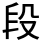

In [12]:
display(Image(filename='img_out/U+6bb5_Noto Sans CJK SC_SemiBold_Default.png'))

### Visualize range of code points

In [13]:
vg.visualize_range(start='\u4e05', end='\u4e09')

Visualizing 5 total code points from 丅 to 三.
Now writing 1st code point.
Finished.
Images stored in directory /tf/img_out.


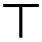

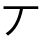

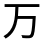

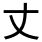

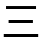

In [14]:
for i in range(ord('\u4e05'), ord('\u4e09')+1):
    display(Image(filename='img_out/U+'+ str(hex(i))[2:]+'_Noto Sans CJK SC_SemiBold_Default.png'))

### Options for generating dataset

In [15]:
# Visualize availble styles for Noto Sans CJK
for style in ['Bold','Medium','Regular','DemiLight','Light','Thin']:
    vg.font_style = style
    vg.visualize_single('段')

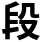

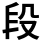

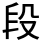

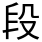

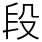

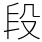

In [16]:
for style in ['Bold','Medium','Regular','DemiLight','Light','Thin']:
    display(Image(filename='img_out/U+6bb5_Noto Sans CJK SC_'+style+'_Default.png'))

In [17]:
# Visualize availble styles for Noto Sans CJK
vg.font_name = 'Noto Sans CJK SC'
vg.font_style = 'Regular'
for antialias in ['Default','Fast','Good','None']:
    vg.antialias = antialias
    vg.visualize_single('段')

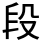

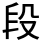

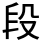

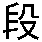

In [18]:
for antialias in ['Default','Fast','Good','None']:
    display(Image(filename='img_out/U+6bb5_Noto Sans CJK SC_Regular_'+antialias+'.png'))

## Generate Training Dataset

The source of code points to include in the dataset comes from `source/charset_1k.txt`. See `source/Radical-stroke Index Analysis.ipynb` for the methodoloty and process we used for choosing the dataset.

In [19]:
vg.image_size = 20
vg.font_size = 16
vg.out_dir = 'data/charset_1k'
for font_name in ['Noto Sans CJK SC', 'Noto Sans CJK JP','Noto Serif CJK TC', 'Noto Serif CJK KR']:
    vg.font_name = font_name
    vg.generate_dataset_from_file('source/charset_1k.txt', ['Bold','Medium','Regular','DemiLight','Light','Thin'],
                                  ['Default','None'])

/tf/charset_1k does not exist, creating directory...
New directory successfully created.
Successfully selected font style: Bold.
Successfully selected antialiasing style: Default.
Visualizing 1000 total code points.
Now writing 1st code point.
Now writing 51st code point.
Now writing 101st code point.
Now writing 151st code point.
Now writing 201st code point.
Now writing 251st code point.
Now writing 301st code point.
Now writing 351st code point.
Now writing 401st code point.
Now writing 451st code point.
Now writing 501st code point.
Now writing 551st code point.
Now writing 601st code point.
Now writing 651st code point.
Now writing 701st code point.
Now writing 751st code point.
Now writing 801st code point.
Now writing 851st code point.
Now writing 901st code point.
Now writing 951st code point.
Finished.
Images stored in directory /tf/charset_1k.
Successfully selected antialiasing style: None.
Visualizing 1000 total code points.
Now writing 1st code point.
Now writing 51st code 

Now writing 701st code point.
Now writing 751st code point.
Now writing 801st code point.
Now writing 851st code point.
Now writing 901st code point.
Now writing 951st code point.
Finished.
Images stored in directory /tf/charset_1k.
Successfully selected antialiasing style: None.
Visualizing 1000 total code points.
Now writing 1st code point.
Now writing 51st code point.
Now writing 101st code point.
Now writing 151st code point.
Now writing 201st code point.
Now writing 251st code point.
Now writing 301st code point.
Now writing 351st code point.
Now writing 401st code point.
Now writing 451st code point.
Now writing 501st code point.
Now writing 551st code point.
Now writing 601st code point.
Now writing 651st code point.
Now writing 701st code point.
Now writing 751st code point.
Now writing 801st code point.
Now writing 851st code point.
Now writing 901st code point.
Now writing 951st code point.
Finished.
Images stored in directory /tf/charset_1k.
Successfully selected font style:

Now writing 551st code point.
Now writing 601st code point.
Now writing 651st code point.
Now writing 701st code point.
Now writing 751st code point.
Now writing 801st code point.
Now writing 851st code point.
Now writing 901st code point.
Now writing 951st code point.
Finished.
Images stored in directory /tf/charset_1k.
Successfully selected font style: Thin.
Successfully selected antialiasing style: Default.
Visualizing 1000 total code points.
Now writing 1st code point.
Now writing 51st code point.
Now writing 101st code point.
Now writing 151st code point.
Now writing 201st code point.
Now writing 251st code point.
Now writing 301st code point.
Now writing 351st code point.
Now writing 401st code point.
Now writing 451st code point.
Now writing 501st code point.
Now writing 551st code point.
Now writing 601st code point.
Now writing 651st code point.
Now writing 701st code point.
Now writing 751st code point.
Now writing 801st code point.
Now writing 851st code point.
Now writing 9

Now writing 351st code point.
Now writing 401st code point.
Now writing 451st code point.
Now writing 501st code point.
Now writing 551st code point.
Now writing 601st code point.
Now writing 651st code point.
Now writing 701st code point.
Now writing 751st code point.
Now writing 801st code point.
Now writing 851st code point.
Now writing 901st code point.
Now writing 951st code point.
Finished.
Images stored in directory /tf/charset_1k.
Successfully selected antialiasing style: None.
Visualizing 1000 total code points.
Now writing 1st code point.
Now writing 51st code point.
Now writing 101st code point.
Now writing 151st code point.
Now writing 201st code point.
Now writing 251st code point.
Now writing 301st code point.
Now writing 351st code point.
Now writing 401st code point.
Now writing 451st code point.
Now writing 501st code point.
Now writing 551st code point.
Now writing 601st code point.
Now writing 651st code point.
Now writing 701st code point.
Now writing 751st code poi

Now writing 201st code point.
Now writing 251st code point.
Now writing 301st code point.
Now writing 351st code point.
Now writing 401st code point.
Now writing 451st code point.
Now writing 501st code point.
Now writing 551st code point.
Now writing 601st code point.
Now writing 651st code point.
Now writing 701st code point.
Now writing 751st code point.
Now writing 801st code point.
Now writing 851st code point.
Now writing 901st code point.
Now writing 951st code point.
Finished.
Images stored in directory /tf/charset_1k.
Successfully selected font style: Light.
Successfully selected antialiasing style: Default.
Visualizing 1000 total code points.
Now writing 1st code point.
Now writing 51st code point.
Now writing 101st code point.
Now writing 151st code point.
Now writing 201st code point.
Now writing 251st code point.
Now writing 301st code point.
Now writing 351st code point.
Now writing 401st code point.
Now writing 451st code point.
Now writing 501st code point.
Now writing 

## Split Training and Testing Dataset

In [3]:
vg.out_dir = 'data/charset_1k'
vg.train_test_split()

Creating train test split with 48000 total records...
Train size: 47900
Test size: 100
Train test split successfully created.
Training dataset has 1000 categories.
Test dataset has 97 categories.
All test categories in training data: True


(47900, 100)

The information printed out by `vg.train_test_split` is useful for creating TensorFlow dataset.

## Get Pre-defined TensorFlow Models

In [6]:
import custom_model

In [7]:
# Configurations
custom_model.INPUT_SHAPE

(32, 32, 3)

In [8]:
custom_model.NUM_CLASSES

1000

In [9]:
# Available models
print(custom_model.MODEL_MAP.keys())

dict_keys(['ResNet50', 'MobileNetV2', 'VGG16'])


In [10]:
# Select the ResNet50 model
resnet_model, input_name = custom_model.create_full_model('ResNet50')

In [11]:
# See summary of full model
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              2049000   
Total params: 25,636,712
Trainable params: 25,583,592
Non-trainable params: 53,120
_________________________________________________________________


In [12]:
# See summary of inner model (ResNet50)
resnet_model.layers[0].summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [13]:
# See input tensor
resnet_model.input

<tf.Tensor 'resnet50_input:0' shape=(None, 32, 32, 3) dtype=float32>

In [14]:
# See output tensor
resnet_model.output

<tf.Tensor 'dense/Identity:0' shape=(None, 1000) dtype=float32>

## Get TensorFlow Dataset

In [15]:
import custom_dataset

To build your own dataset for training, change the attributes listed below.

### Dataset metadata

In [16]:
custom_dataset.TRAIN_DATA_DIR

'data/charset_1k'

In [17]:
custom_dataset.TEST_DATA_DIR

'data/charset_1k_test'

In [18]:
custom_dataset.LABEL_FILE

'source/charset_1k.txt'

### Training configurations

In [19]:
custom_dataset.TRAIN_BATCH_SIZE

64

In [20]:
custom_dataset.TEST_BATCH_SIZE

1

### Data augmentation configurations

In [21]:
custom_dataset.RANDOM_ROTATE # If true, randomly rotate the image

True

In [22]:
custom_dataset.ROTATE_STDDEV

0.35

In [23]:
custom_dataset.RANDOM_ZOOM # If true, randomly zoom in on the image

True

In [24]:
custom_dataset.MAX_ZOOM_PERCENT

4

In [25]:
custom_dataset.ZOOM_STDDEV

0.4

In [26]:
custom_dataset.RESIZE # If true, resize the image

True

In [27]:
custom_dataset.RESIZE_HEIGHT

32

In [28]:
custom_dataset.RESIZE_WIDTH

32

Notice the **resized image size** should be the same as **model input size**!

## Nueral Network Training

The purpose of CNN model is to take an image of character as input, and produce a representation of that image in a high-dimensional space. To achieve that goal, we will utilize method of **Triplet Loss** and **Triplet Training** mentioned in FaceNet paper (https://arxiv.org/abs/1503.03832). However, **Triplet Loss** takes a very long time to converge, so we will use the method of transfer learning by following these procedures:
1. Train the CNN classificaton network with 1000 classes using cross entropy loss.
2. Freeze the first several layers of the CNN network so that the feature map will not change in training.
3. Disregard the final **logit** layer of the network.
4. Train the CNN encoder network with **triplet loss** using proper margin.

In [29]:
from custom_train_eval import LR_SCHEDULE_MAP, OPTIMIZER_MAP, LOSS_MAP, METRIC_MAP

### Pre-defined learning rate schedule, optimizer, loss function and metrics

In [30]:
LR_SCHEDULE_MAP

{'ExponentialDecay': tensorflow.python.keras.optimizer_v2.learning_rate_schedule.ExponentialDecay,
 'PiecewiseConstantDecay': tensorflow.python.keras.optimizer_v2.learning_rate_schedule.PiecewiseConstantDecay,
 'PolynomialDecay': tensorflow.python.keras.optimizer_v2.learning_rate_schedule.PolynomialDecay}

In [31]:
OPTIMIZER_MAP

{'Adam': tensorflow.python.keras.optimizer_v2.adam.Adam,
 'RMSprop': tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop}

In [32]:
LOSS_MAP

{'CrossEntropy': tensorflow.python.keras.losses.CategoricalCrossentropy,
 'TripletHard': tensorflow_addons.losses.triplet.TripletHardLoss,
 'TripletSemiHard': tensorflow_addons.losses.triplet.TripletSemiHardLoss}

In [33]:
METRIC_MAP

{'Accuracy': tensorflow.python.keras.metrics.CategoricalAccuracy}

### Classification network training

Training takes more than 2 days to finish without dedicated hardware.

In [ ]:
# # Get pre-defiend ResNet50 model
# model, input_name = create_full_model(model_name)

# # Set when to decrease learning rate and what to decrease to
# boundaries = [20000, 25000]
# values = [0.001, 0.0001, 0.00001]
# lr_schedule = LR_SCHEDULE_MAP['PiecewiseConstantDecay'](
#     boundaries=boundaries, values=values)

# # Set optimizer
# optimizer = OPTIMIZER_MAP['Adam'](learning_rate=lr_schedule)

# # Set loss function
# loss = LOSS_MAP['CrossEntropy'](from_logits=True)

# # Set accuracy metrics
# accuracy = METRIC_MAP['Accuracy']()
# model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

# # Train model and write events to model_dir
# estimator = tf.keras.estimator \
#     .model_to_estimator(keras_model=model, model_dir='ckpts/ResNet50Base')
# train_spec = tf.estimator.TrainSpec(input_fn=get_train_input_fn(input_name),
#                                     max_steps=30000)
# eval_spec = tf.estimator.EvalSpec(input_fn=get_eval_input_fn(input_name))

# tf.estimator.train_and_evaluate(estimator, train_spec, eval_spec)

### Use tensorboard to monitor training metrics

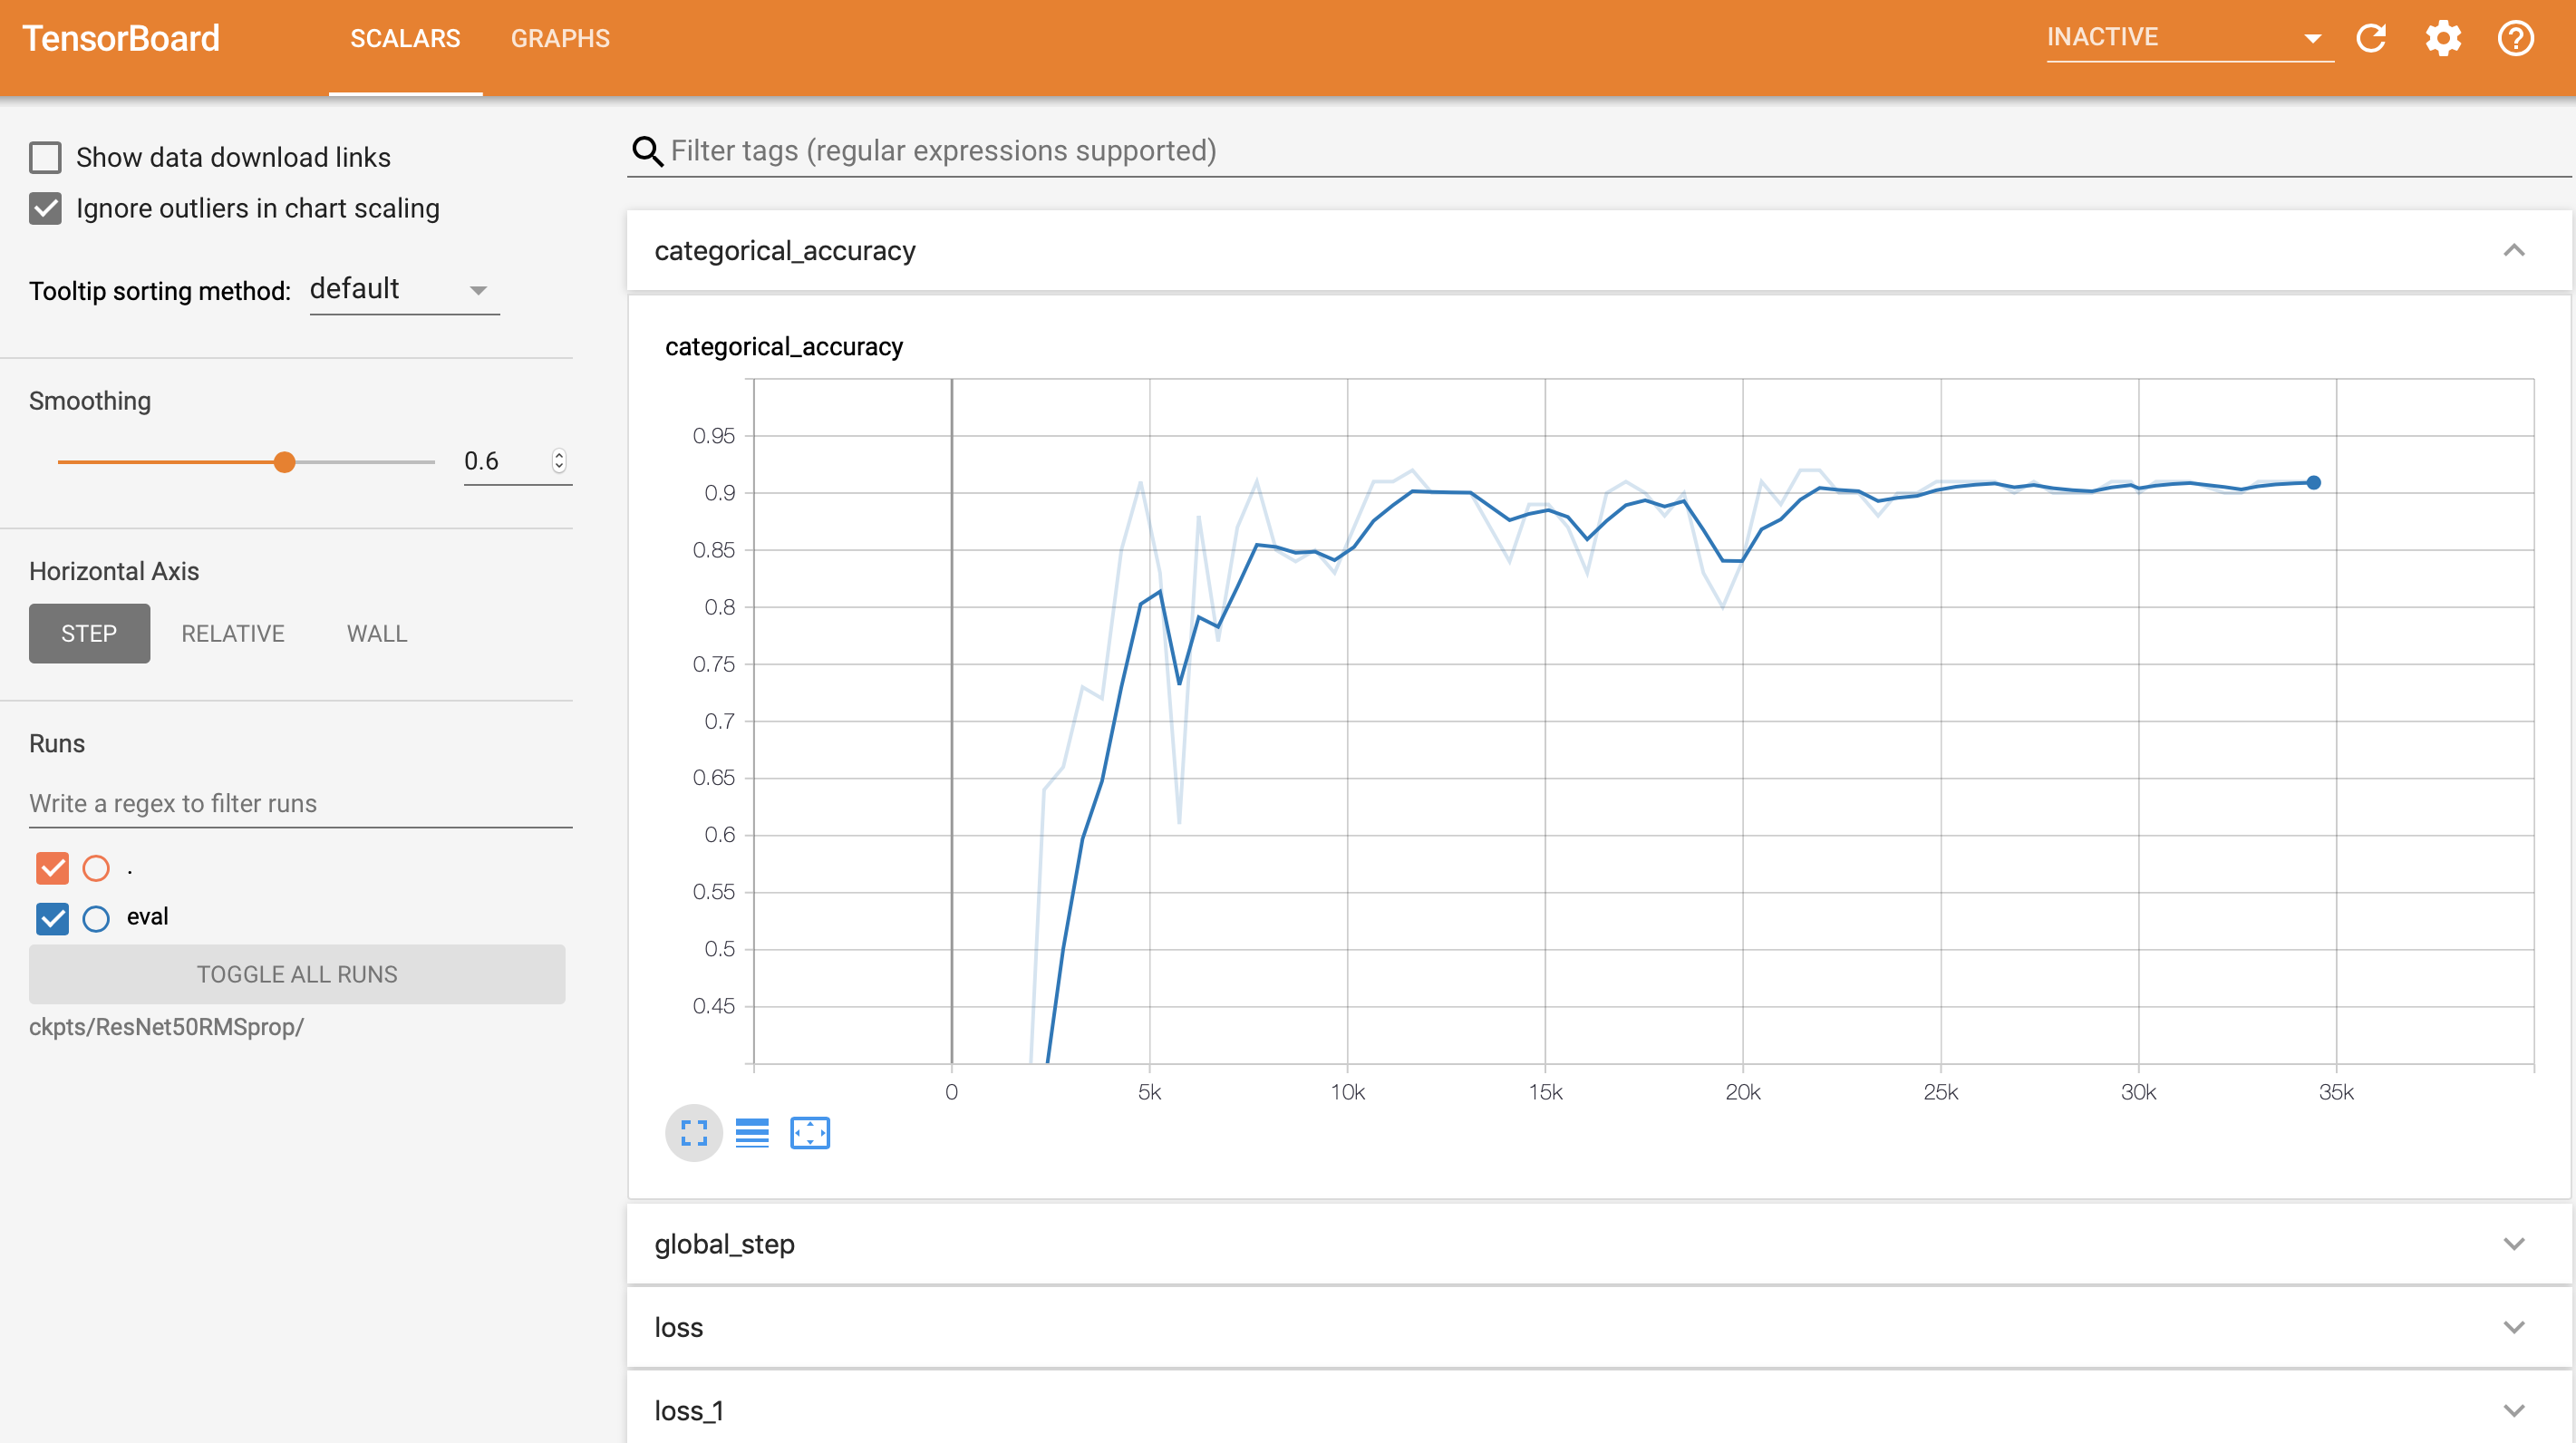

In [38]:
display(Image(filename='pictures/training_categorical_01.png'))

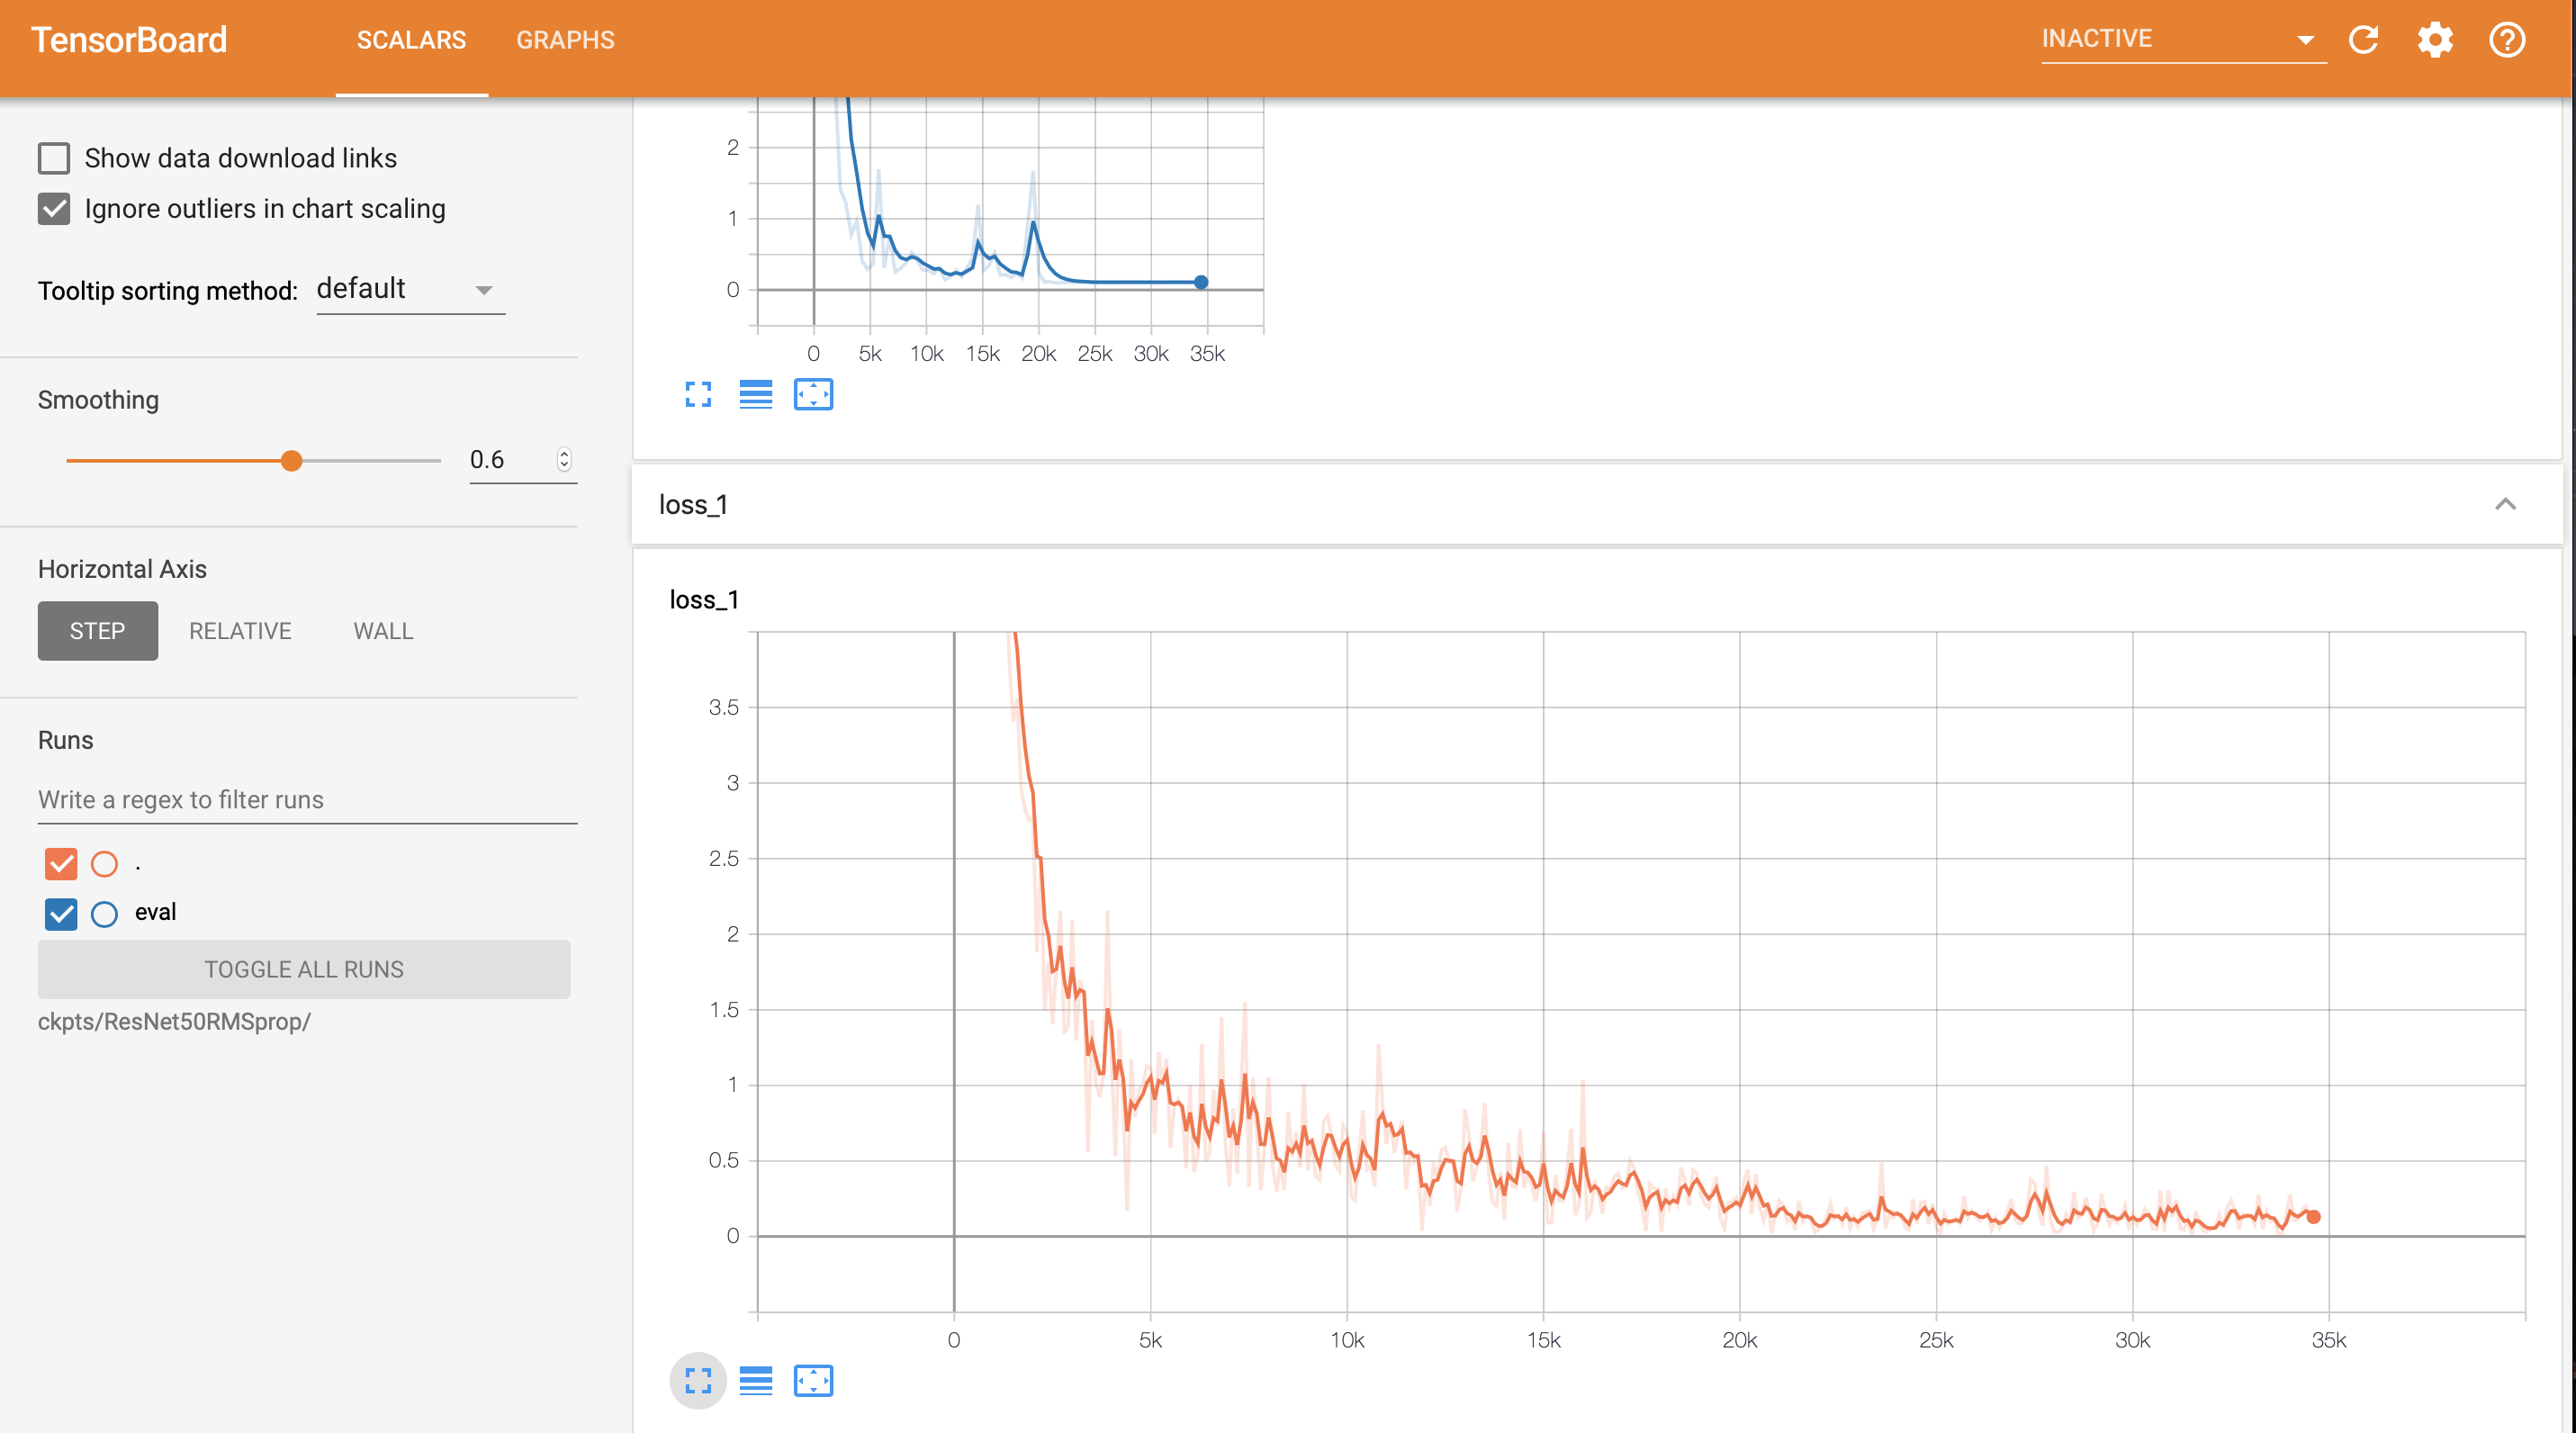

In [39]:
display(Image(filename='pictures/training_categorical_02.png'))

### Freeze layers

In [ ]:
# # Create full model again
# model, input_name = create_full_model('ResNet50')
# model.summary()

# # Set optimizer
# optimizer = OPTIMIZER_MAP['Adam'](0.001)

# # Checkpoint_directory contains the pre-trained model
# checkpoint_directory = "ckpts/ResNet50Base"

# # Load weights
# latest = tf.train.latest_checkpoint(checkpoint_directory)
# model.load_weights(latest)

# # Freeze layers
# freeze_var_names = ['conv1', 'conv2', 'conv3', 'conv4']
# freeze_layers = [layer for layer in model.layers[0].layers if layer.name[:5] in freeze_var_names]
# for layer in freeze_layers:
#     layer.trainable = False

### Encoder network training

Training will take more than a day without dedicated hardware. Because the limitation of the hardware, we limit each dataset to have only 40 classes and keep batch size at 64. See https://omoindrot.github.io/triplet-loss for why this is needed.

**You can download the required folder from https://drive.google.com/drive/folders/1ipofZ-BiQzZemFI-aaVnNsciuMUn0zjb?usp=sharing. Place the downloaded folder in `ckpts/` directory to continue.**

In [40]:
# loss = LOSS_MAP['TripletSemiHard'](margin=1.0)
# model.compile(optimizer=optimizer, loss=loss)

# for i in range(150):
#     print('Cycle #{}'.format(i+1))
#     train_dataset = get_train_dataset(filter_size=40)
#     history = model.fit(
#         train_dataset,
#         epochs=8
#     )
#     if (i+1) % 50 == 0:
#         model.save_weights('ckpts/TripletTransferTF/ResNet50Triplet_#{}'.format(i+1))
# model.save_weights('ckpts/TripletTransferTF/ResNet50Triplet')

## Generate Full Dataset

In [10]:
vg = VisGen()
vg.out_dir = 'data/full_data'

In [11]:
vg.font_name

'Noto Sans CJK SC'

In [12]:
vg.generate_dataset_from_file('source/full_dataset.txt', ['Regular'], ['Default'])

/tf/data/full_data does not exist, creating directory...
New directory successfully created.
Successfully selected font style: Regular.
Successfully selected antialiasing style: Default.
Visualizing 21028 total code points.
Now writing 1st code point.
Now writing 51st code point.
Now writing 101st code point.
Now writing 151st code point.
Now writing 201st code point.
Now writing 251st code point.
Now writing 301st code point.
Now writing 351st code point.
Now writing 401st code point.
Now writing 451st code point.
Now writing 501st code point.
Now writing 551st code point.
Now writing 601st code point.
Now writing 651st code point.
Now writing 701st code point.
Now writing 751st code point.
Now writing 801st code point.
Now writing 851st code point.
Now writing 901st code point.
Now writing 951st code point.
Now writing 1001st code point.
Now writing 1051st code point.
Now writing 1101st code point.
Now writing 1151st code point.
Now writing 1201st code point.
Now writing 1251st code 

Now writing 12801st code point.
Now writing 12851st code point.
Now writing 12901st code point.
Now writing 12951st code point.
Now writing 13001st code point.
Now writing 13051st code point.
Now writing 13101st code point.
Now writing 13151st code point.
Now writing 13201st code point.
Now writing 13251st code point.
Now writing 13301st code point.
Now writing 13351st code point.
Now writing 13401st code point.
Now writing 13451st code point.
Now writing 13501st code point.
Now writing 13551st code point.
Now writing 13601st code point.
Now writing 13651st code point.
Now writing 13701st code point.
Now writing 13751st code point.
Now writing 13801st code point.
Now writing 13851st code point.
Now writing 13901st code point.
Now writing 13951st code point.
Now writing 14001st code point.
Now writing 14051st code point.
Now writing 14101st code point.
Now writing 14151st code point.
Now writing 14201st code point.
Now writing 14251st code point.
Now writing 14301st code point.
Now writ

## Representation Generation

In [42]:
from rep_gen import RepGen
rg = RepGen(ckpt_dir='ckpts/TripletTransferTF', model_name='ResNet50')

ResNet50 model successfully created.
ResNet50 model successfully loaded weights from ckpts/TripletTransferTF.


### Properties (settings)

In [44]:
rg.model_name # Name of the pre-defined model we used

'ResNet50'

In [46]:
rg.ckpt_dir # Name of the checkpoint (weights) direcotry

'ckpts/TripletTransferTF'

In [47]:
rg.out_dir # Where the representations will be stored

'embeddings'

### Generate representations (embeddings) for full dataset

In [49]:
# rg.write_embeddings_from_image(img_dir='data/full_data/', out_file='full_data_triplet1.0')

This will generate two files **full_data_triplet1.0_meta.tsv** (labels) and **full_data_triplet1.0_vec.tsv** (embeddings) in `embeddings/` directory. However, this generation will take a fairly long time.

**You can download the required 2 files from https://drive.google.com/drive/folders/1QWUDridC499uqmXJJZYKgUf2fPmlgAeB?usp=sharing. Put the files into `embeddings/` folder to continue!**

### Use TensorFlow embedding projector to visualize embeddings

**Go to website https://projector.tensorflow.org and choose to loada the embeddings and labels we generated.**

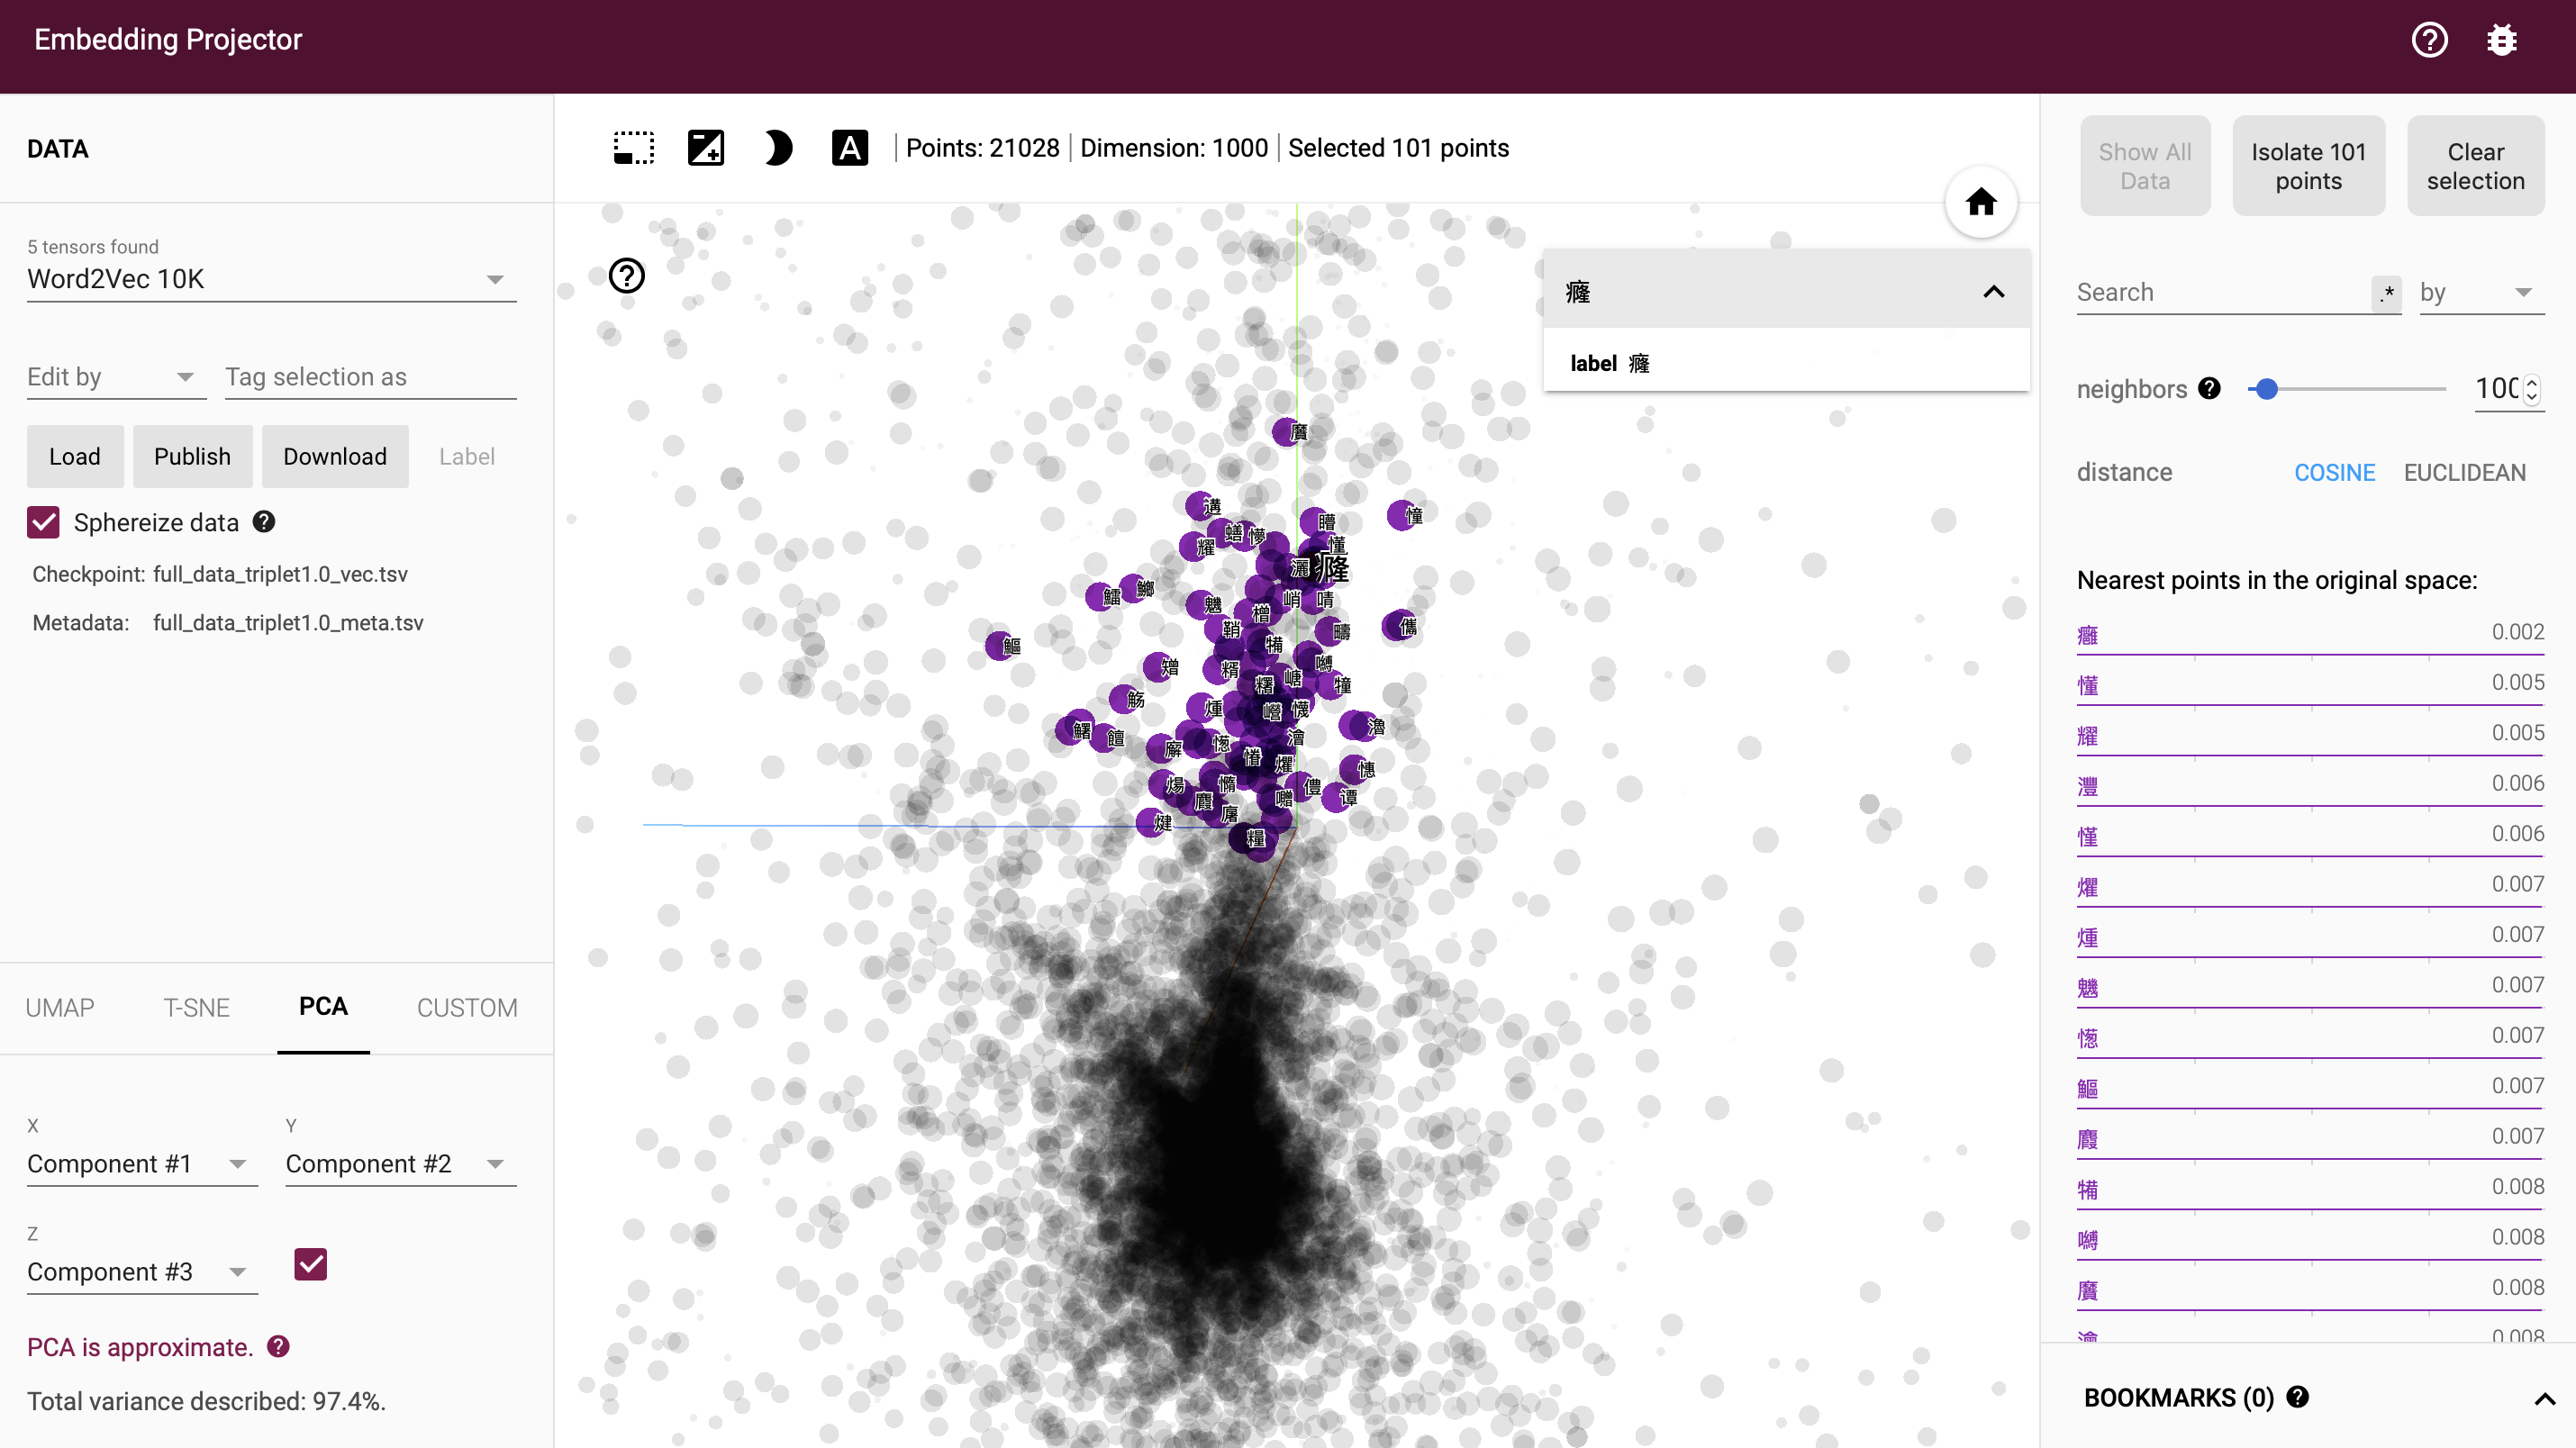

In [74]:
display(Image(filename='pictures/embedding_projector.png'))

## Distance Calculation

In [14]:
from distance_metrics import Distance, ImgFormat
distance = Distance(img_format=ImgFormat.RGB)

### List all image formats

In [15]:
list(ImgFormat)

[<ImgFormat.RGB: 1>,
 <ImgFormat.A8: 2>,
 <ImgFormat.A1: 3>,
 <ImgFormat.EMBEDDINGS: 4>]

### Get supported distance metrics for RGB image

In [16]:
metrics = distance.get_metrics()
metrics.keys()

dict_keys(['manhattan', 'sum_squared', 'cross_correlation'])

### Calculate distance between two images

In [21]:
d = distance.calculate_from_path(metric=metrics['cross_correlation'], 
                                 path1='img_out/19973_Noto Sans CJK HK_SemiBold_None.png', 
                                 path2='img_out/19974_Noto Sans CJK HK_SemiBold_None.png')
print('Distance between {} and {} is {}'.format(chr(19973), chr(19974), d))

Distance between 丅 and 丆 is 0.13945375382900238


In [22]:
d = distance.calculate_from_path(metric=metrics['cross_correlation'], 
                                 path1='img_out/19973_Noto Sans CJK HK_SemiBold_None.png', 
                                 path2='img_out/19976_Noto Sans CJK HK_SemiBold_None.png')
print('Distance between {} and {} is {}'.format(chr(19973), chr(19976), d))

Distance between 丅 and 丈 is 0.29181215167045593


## Representation Clustering

In [50]:
from rep_cls import RepCls
rc = RepCls(embedding_file='embeddings/full_data_triplet1.0_vec.tsv',
            label_file='embeddings/full_data_triplet1.0_meta.tsv',
            img_dir='data/full_data/')

Reading embeddings from file embeddings/full_data_triplet1.0_vec.tsv...
Successfully read from file embeddings/full_data_triplet1.0_vec.tsv.
Reading labels from file embeddings/full_data_triplet1.0_meta.tsv...
Successfully read from file embeddings/full_data_triplet1.0_meta.tsv.
Building PCA models.
Fitting PCA models.
Generating reduced embeddings as representations.


### Properties (settings)

In [51]:
rc.embedding_file

'embeddings/full_data_triplet1.0_vec.tsv'

In [52]:
rc.label_file

'embeddings/full_data_triplet1.0_meta.tsv'

In [53]:
rc.img_dir

'data/full_data/'

In [58]:
rc.img_format

<ImgFormat.RGB: 1>

In [59]:
rc.n_candidates # Number of candidates to consider when generating confusables

50

In [60]:
rc.pca_dimensions # PCA is used to increase speed

[5, 10, 20, 100, 500]

In [61]:
rc.primary_distance_type # Primary distance metric type to be used to filter N candidates

'manhattan'

In [62]:
rc.secondary_distance_type # Secondary distance metric type to be used to filter confusables

'sum_squared'

In [63]:
rc.secondary_filter_threshold # Secondary distance metric threshold to be used to filter confusables

0.1

### Generate confusable clusters for single character

## 褢

In [66]:
confusables, _ = rc.get_confusables_for_char('褢')
confusables

['裹', '裛', '裏', '裏']

## 黪

In [67]:
confusables, _ = rc.get_confusables_for_char('黪')
confusables

['黲', '黵', '黢']

## 剌

In [68]:
confusables, _ = rc.get_confusables_for_char('剌')
confusables

['剎', '剠']

## 閪

In [69]:
confusables, _ = rc.get_confusables_for_char('閪')
confusables

['闞', '鬫']

## 褘

In [70]:
confusables, _ = rc.get_confusables_for_char('褘')
confusables

['禕']

## 柆

In [71]:
confusables, _ = rc.get_confusables_for_char('柆')
confusables

['拉', '抆']